### Unsupervised Learning: Principal Component Analysis
#### PCA: Visualize and classify MNIST handwritten images

- Dataset: hand written dataset (mnist_28x28_5000rows.csv.zip)
- Learning Date: 4-Sep-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

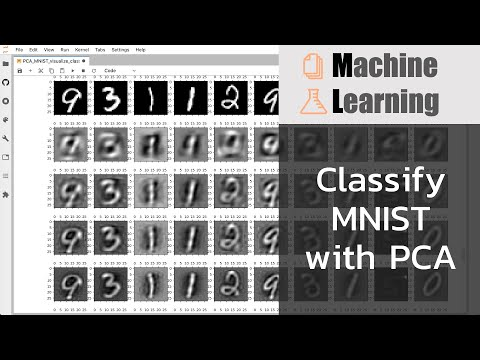

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('QIB6G0pkwmI', width = 720, height = 405)

In [2]:
# import libraries

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
pd.Timestamp.now()

Timestamp('2023-09-13 07:55:44.027505')

In [4]:
# read csv.zip data into a dataframe

data_file = 'https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip'
print(f'data_file: {data_file}')

data_file: https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip


In [5]:
df = pd.read_csv(data_file)
df.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df.shape

(5000, 785)

In [7]:
28*28

784

In [8]:
print(df.columns)

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)


In [9]:
D = df[df.columns[df.columns.str.startswith('pixel')]].to_numpy()
D.shape

(5000, 784)

In [10]:
D.shape[1]/28

28.0

n = 2449
target = 3


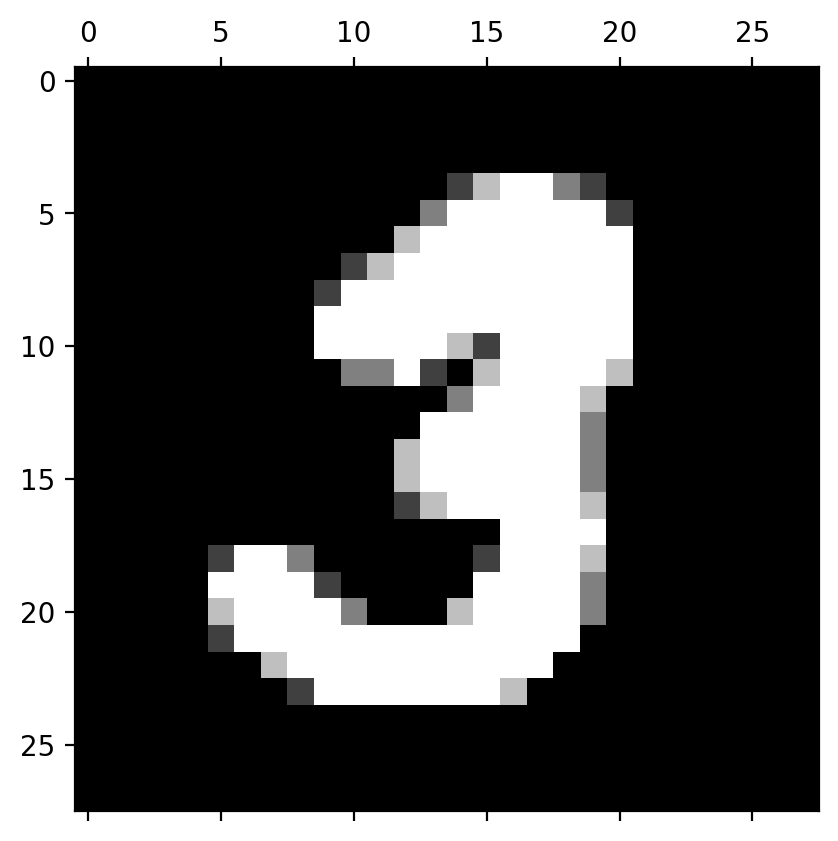

In [11]:
n = np.random.randint(0, D.shape[0])
print(f'n = {n}')
print(f"target = {df['class'].iloc[n]}")
plt.matshow(D[n].reshape(28, 28), cmap='gray')

In [12]:
df['class'].to_numpy()[:10] # target/label

array([3, 3, 1, 1, 3, 9, 1, 4, 2, 4])

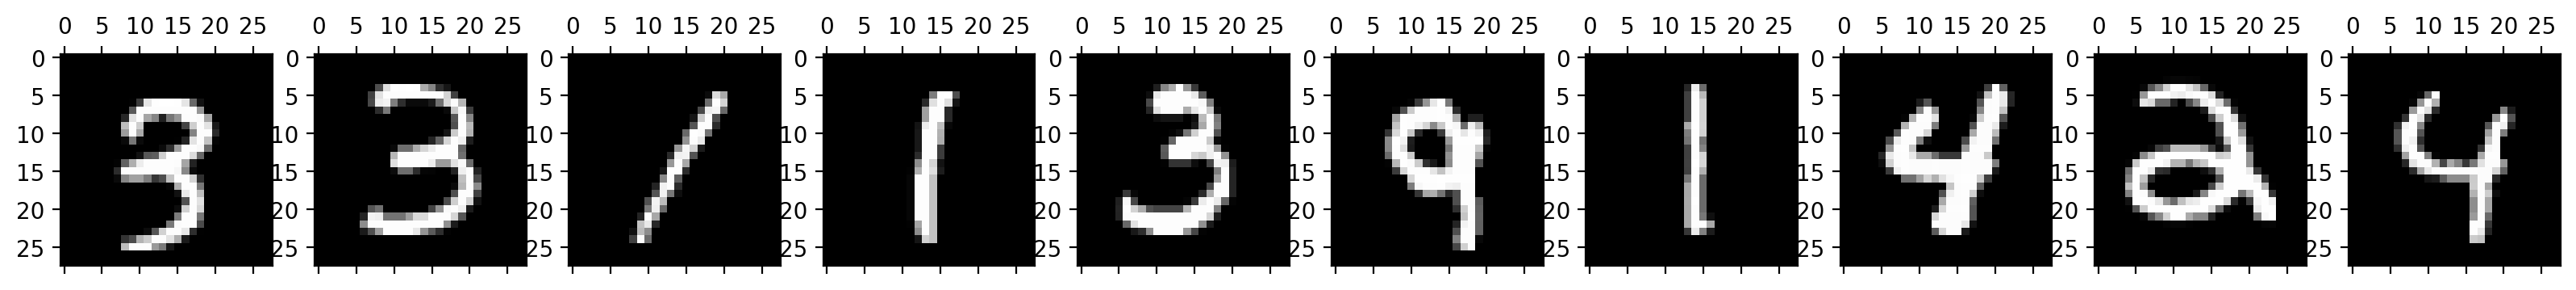

In [13]:
n = 10

fig, ax = plt.subplots(1, n, figsize = (20, 4))

[ax[i].matshow(D[i].reshape(28, -1), cmap='gray') for i in range(n)];

### Train test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# get X and y

X = df[df.columns[df.columns.str.startswith('pixel')]]
y = df['class']

In [16]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X.shape

(5000, 784)

In [18]:
y.head()

0    3
1    3
2    1
3    1
4    3
Name: class, dtype: int64

In [19]:
y.shape

(5000,)

In [20]:
test_size = .2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 7, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 784), (1000, 784), (4000,), (1000,))

In [21]:
X_train[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_train['pixel780']

2938    0
1408    0
1556    0
4297    0
4748    0
       ..
2054    0
1135    0
4173    0
3425    0
3355    0
Name: pixel780, Length: 4000, dtype: int64

### Principal Component Analysis (PCA)

In [23]:
# import libraries

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Standardized data (mean = 0, s = 1)

In [24]:
scaler = StandardScaler() # fit/tr5ain on training set only
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train_t = scaler.transform(X_train)
X_train_t

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
X_test_t = scaler.transform(X_test)
X_test_t

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### StandardScaler (z-score)

$$s = \frac{x_{i} - \bar{x}}{sd}$$

In [27]:
scaler.mean_[321:325]

array([74.8595 , 78.61175, 88.4155 , 97.8515 ])

In [28]:
scaler.var_[321:325]

array([10157.13075975, 10796.32851194, 11548.81535975, 11561.08844775])

In [29]:
X_train_t[:, 321].mean()

3.153033389935444e-17

In [30]:
X_train_t[:, 321].std()

1.0

In [31]:
# a function to scree plot

def scree_plot(X, n_components, with_cumulative = False, show_data_label = False, figsize = (10, 7)):

    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t = scaler.fit_transform(X)

    max_components = min(X.shape)
    x = np.arange(1, n_components + 1)
    pca = PCA(n_components = max_components)
    pca.fit_transform(X_t)
    y1 = pca.explained_variance_ratio_[:n_components]
    y2 = np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize = figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle = '--', marker = marker, label = 'cumulative', color = 'salmon')
        
    plt.plot(x, y1, linestyle = '-', marker = marker, label = 'individual', color = 'deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y = xl, color = '.7', linestyle = '--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis = 'x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags = ['refs_ok']), 
                            np.nditer(y1, flags = ['refs_ok']),
                            np.nditer(y2, flags = ['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize = 10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize = 10)
                            

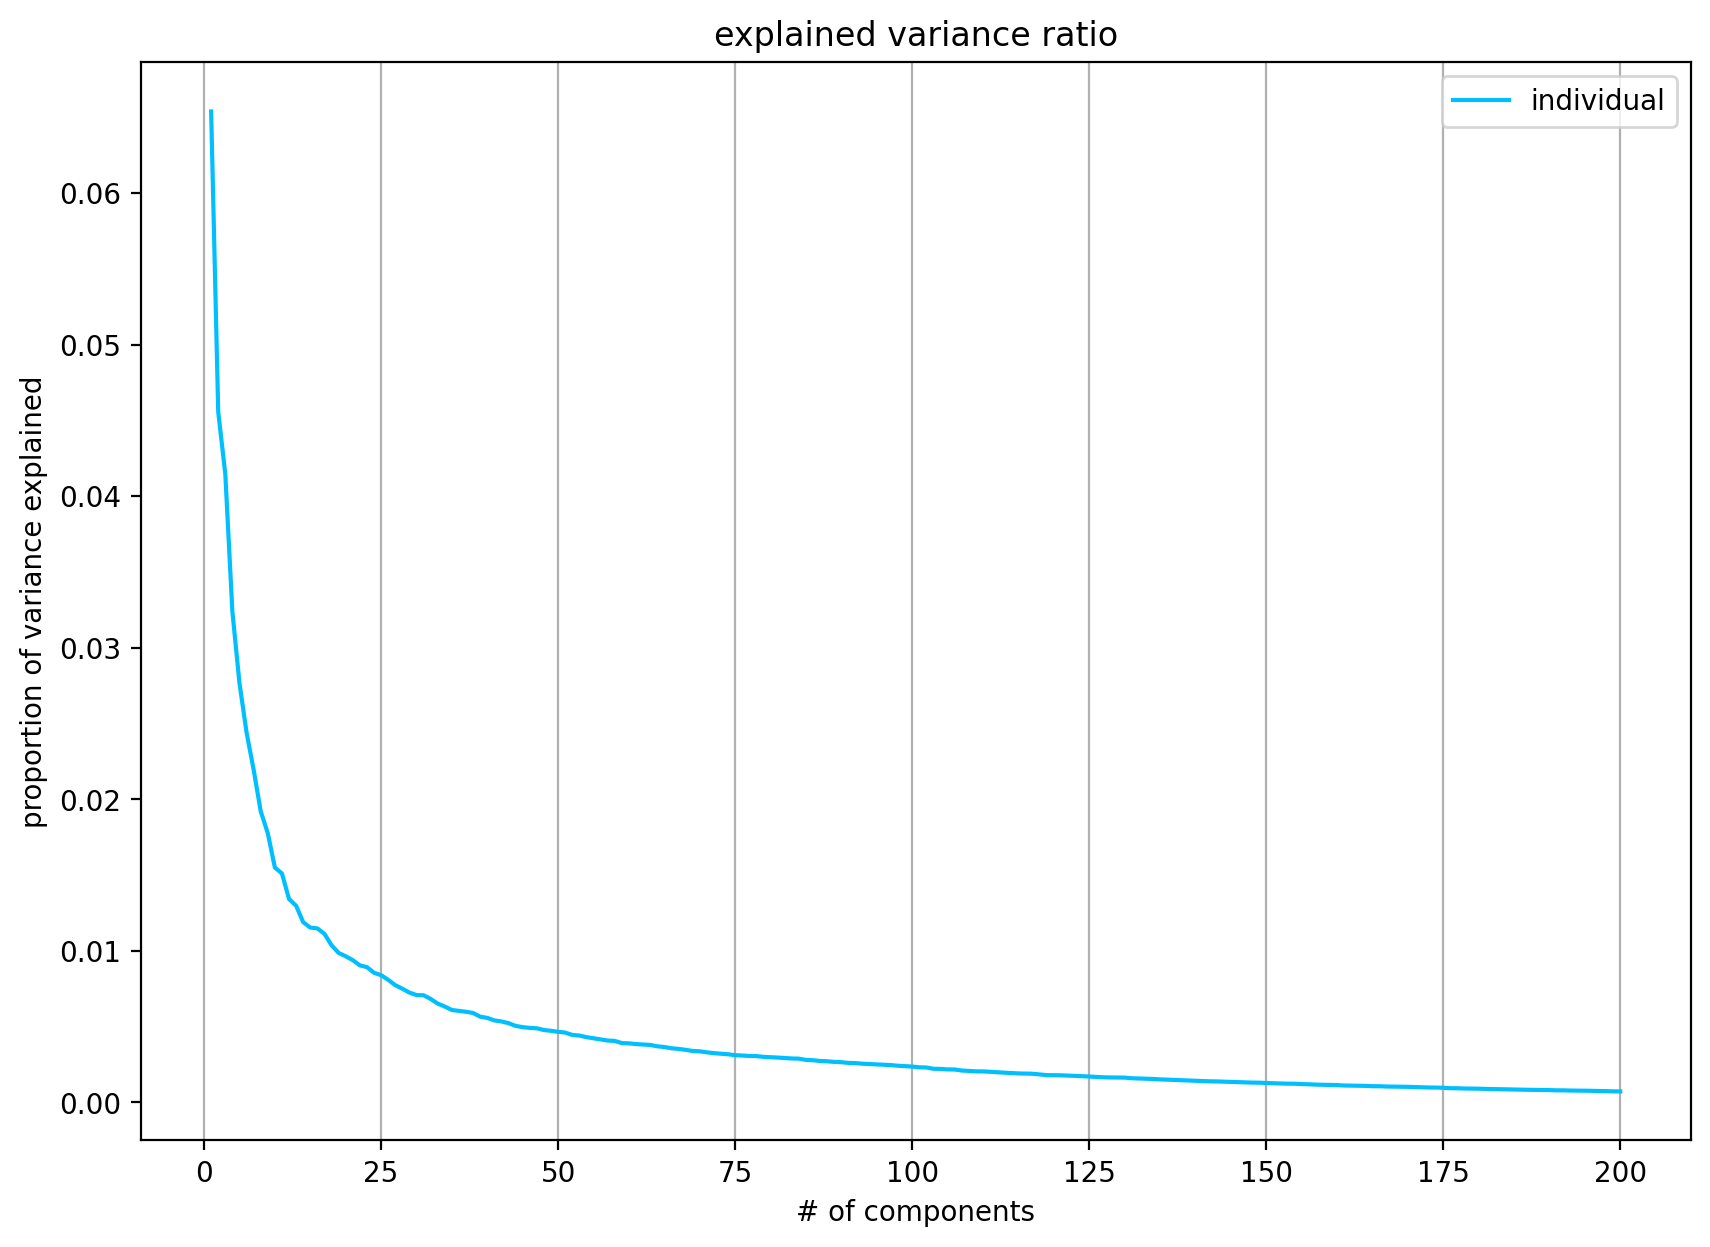

In [32]:
scree_plot(X_train, 200, False, False)

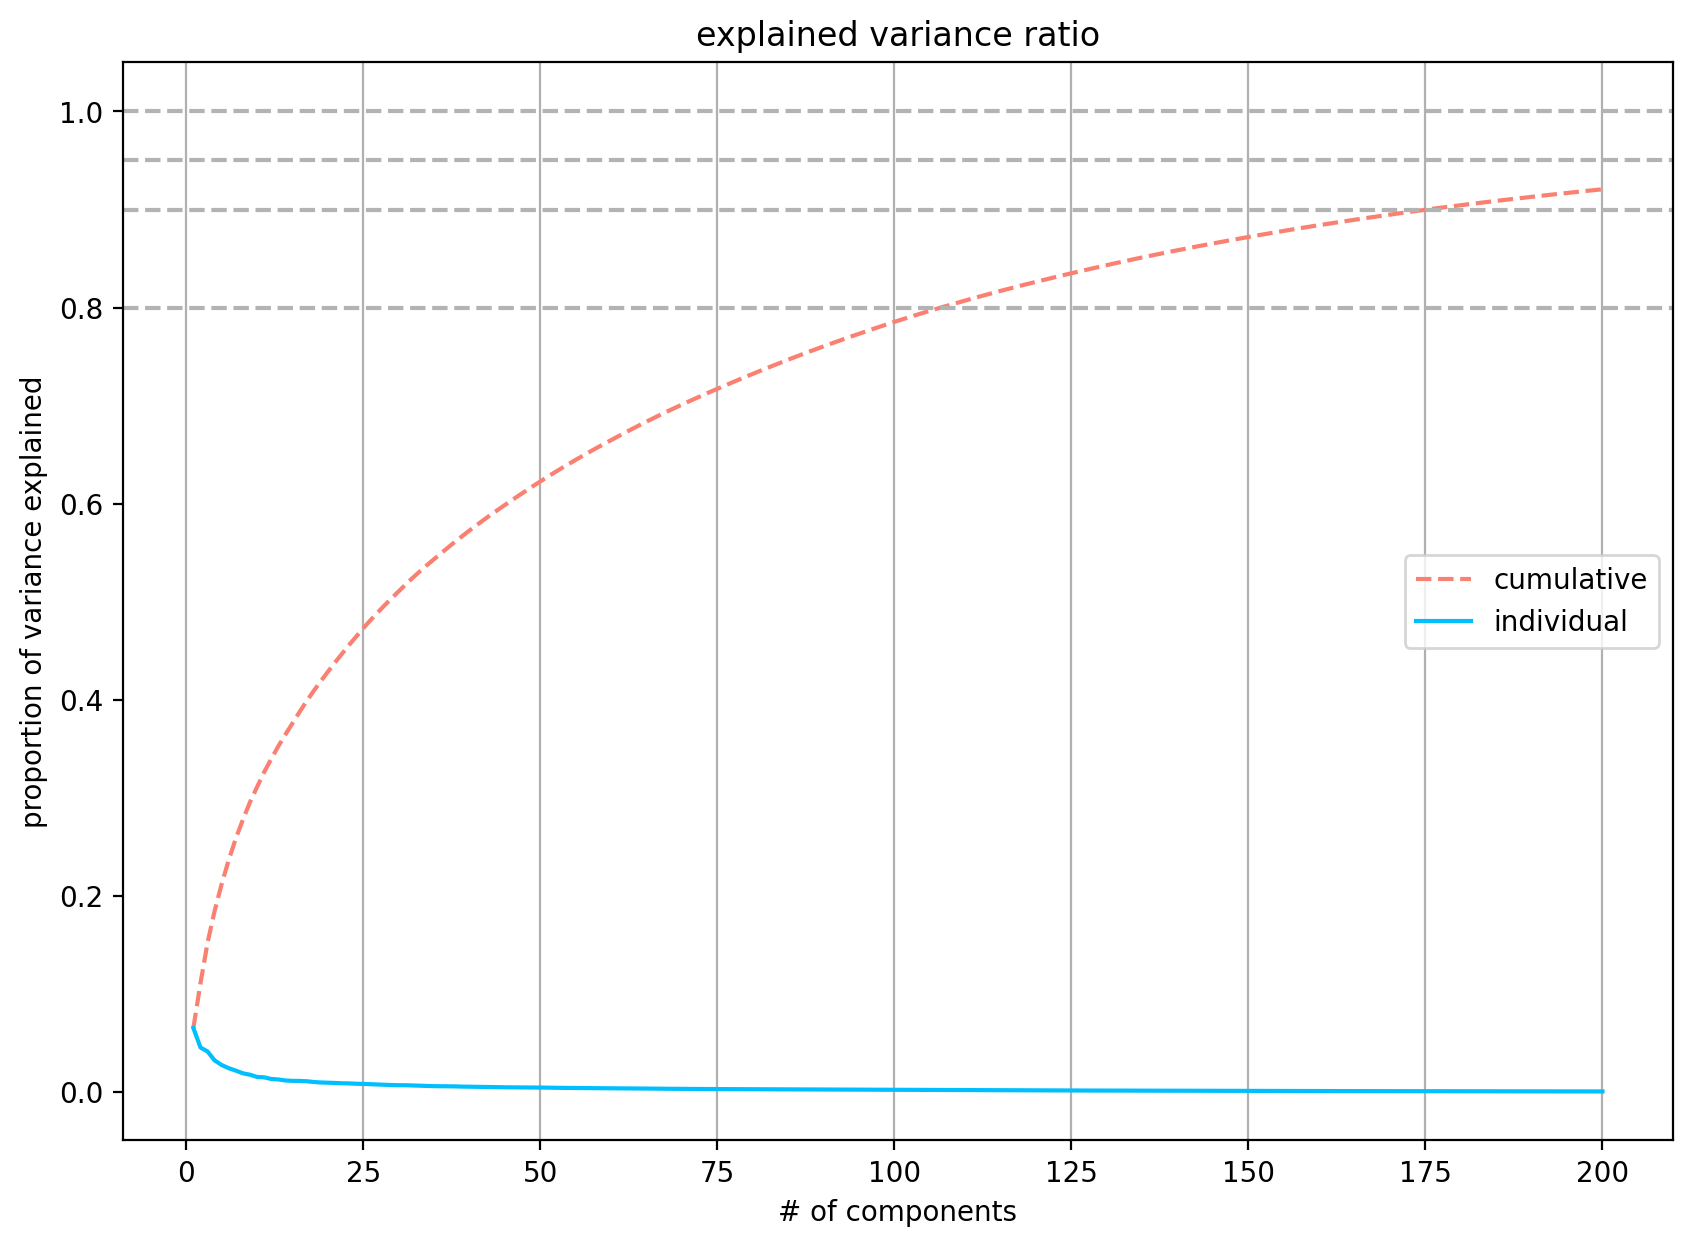

In [33]:
scree_plot(X_train, 200, True, False)

In [34]:
# If 0 < n_components < 1 and svd_solver == 'full', 
# select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
# pca = PCA(.90)
pca = PCA(176)
# pca = PCA(n_components = 784)
pca

PCA(n_components=176)

In [35]:
pca.fit(X_train_t)

PCA(n_components=176)

In [36]:
print(pca.fit(X_train_t))

PCA(n_components=176)


In [37]:
pca.n_components_

176

In [38]:
X_train_pca = pca.transform(X_train_t) # Apply dimensionality reduction to X_train_t
X_train_pca

array([[ 0.80159494,  2.32516081, -7.61004025, ...,  0.75087426,
         0.40474724, -0.23113951],
       [ 0.70216604,  3.78121712,  5.8424291 , ...,  0.35465603,
         0.56828977,  0.05631729],
       [-7.50629718,  0.27730219,  1.28946552, ...,  0.55175785,
        -0.16963415,  0.59118626],
       ...,
       [-2.30235166, -1.28428083, -6.23036094, ...,  0.62627121,
         1.29136376, -0.72939186],
       [ 7.41678832, -3.41746603, -1.20808982, ...,  1.17756457,
        -0.86273698, -0.31001409],
       [13.8545928 ,  4.30713549, -0.29230131, ...,  0.33270325,
        -0.31530173, -0.16744925]])

In [39]:
len(X_train), len(X_train_pca)

(4000, 4000)

In [40]:
X_train.shape, X_train_pca.shape

((4000, 784), (4000, 176))

In [41]:
X_test_pca = pca.transform(X_test_t) # Apply dimensionality reduction to X_test_t
X_test_pca

array([[ -3.92927455,   7.66154283,  -7.21922601, ...,   0.33698174,
         -0.53271881,  -1.95447488],
       [ -5.20829485,  -2.0478185 ,   2.83945301, ...,  -0.03163657,
         -1.00598188,   0.16566041],
       [ -8.72348644,  -1.28599736,   3.03524852, ...,   0.93217905,
         -0.10636194,  -0.0432977 ],
       ...,
       [  4.84383382,  -1.0648207 , -11.68385699, ...,  -1.09215559,
          0.04008106,  -0.73304668],
       [  4.21101885,   6.77382631,   5.17216792, ...,   0.58489194,
         -0.0434591 ,   1.22740381],
       [ 12.47008686,   0.18417196,  -1.48172951, ...,   0.21946087,
          0.61318686,   0.26547586]])

In [42]:
len(X_test), len(X_test_pca)

(1000, 1000)

In [43]:
X_test.shape, X_test_pca.shape

((1000, 784), (1000, 176))

In [44]:
pca.components_.shape # Eigenvectors

(176, 784)

In [45]:
dpc = pd.DataFrame(pca.components_.T, index = X_train.columns, columns = [f'PC{n + 1}' for n in range(pca.components_.shape[0])]).round(4)
dpc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176
pixel1,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
pixel2,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
pixel3,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
pixel4,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0
pixel5,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
pixel781,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
pixel782,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
pixel783,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0


#### Compare image

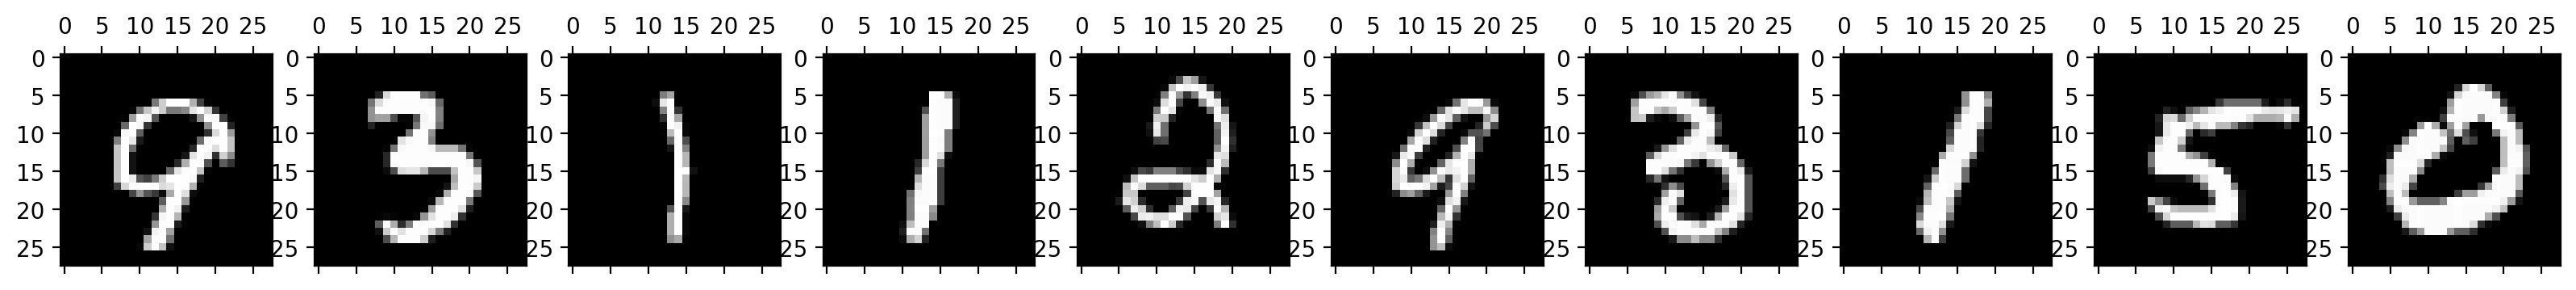

In [46]:
XT = X_train.to_numpy()
n_img = 10

fig, ax = plt.subplots(1, n_img, figsize = (20, 4))

[ax[i].matshow(XT[i].reshape(28, -1), cmap = 'gray') for i in range(n_img)]

In [47]:
print(f'X_train_pca.shape     = {X_train_pca.shape}')
print(f'pca.components_.shape = {pca.components_.shape}')

XP = np.dot(X_train_pca, pca.components_).round(4)
print(f'XP.shape              = {XP.shape}')
print(XP)

X_train_pca.shape     = (4000, 176)
pca.components_.shape = (176, 784)
XP.shape              = (4000, 784)
[[ 0.  0.  0. ...  0.  0.  0.]
 [-0. -0.  0. ...  0.  0.  0.]
 [-0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0. -0. -0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


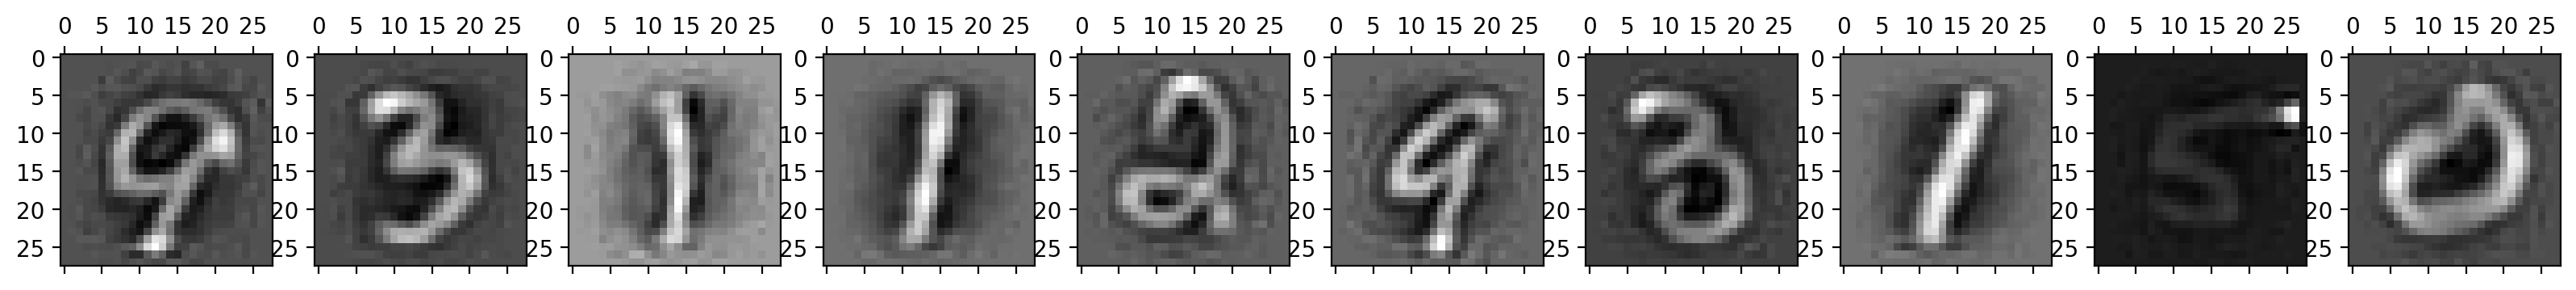

In [48]:
n_img = 10
fig, ax = plt.subplots(1, n_img, figsize = (20, 4))

[ax[i].matshow(XP[i].reshape(28, -1), cmap = 'gray') for i in range(n_img)];

#### Compare different components

In [49]:
# create a functin to compare different components

def plot_varying_components(dfX, n_img = 10, n_components = [10, 20, 30, 50, 100, 200, 300], img_shape = (28, 28)):
    '''
    แสดง image ที่สร้างจาก pca ที่ n_components ต่าง ๆ กัน
    '''
    img_height = img_shape[0]
    img_width = img_shape[1]
    
    X_train = dfX
    scaler = StandardScaler() # Fit on training set only.
    scaler.fit(X_train) # Apply transform

    XT=X_train.to_numpy() # original X_train
    
    fig, ax = plt.subplots(1, n_img, figsize = (20, 4))
    [ax[i].matshow(XT[i].reshape(img_height, img_width), cmap = 'gray') for i in range(n_img)];

    for n_component in n_components:
        X_train_t = scaler.transform(X_train)
        # If 0 < n_components < 1 and svd_solver == 'full', 
        # select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
        pca = PCA(n_components = n_component)
        X_train_pca = pca.fit_transform(X_train_t)  # Apply dimensionality reduction to X_train_t
        print(f'n_component = {n_component:3}(explained variance = {np.sum(pca.explained_variance_ratio_)*100:.2f}%), {X_train_pca.shape}')
        XP = np.dot(X_train_pca, pca.components_) # matrix A x B
        fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
        [ax[i].matshow(XP[i].reshape(img_height, img_width), cmap = 'gray') for i in range(n_img)]

n_component =  10(explained variance = 31.13%), (4000, 10)
n_component =  50(explained variance = 62.23%), (4000, 50)
n_component = 100(explained variance = 78.36%), (4000, 100)
n_component = 200(explained variance = 92.00%), (4000, 200)
n_component = 300(explained variance = 96.55%), (4000, 300)


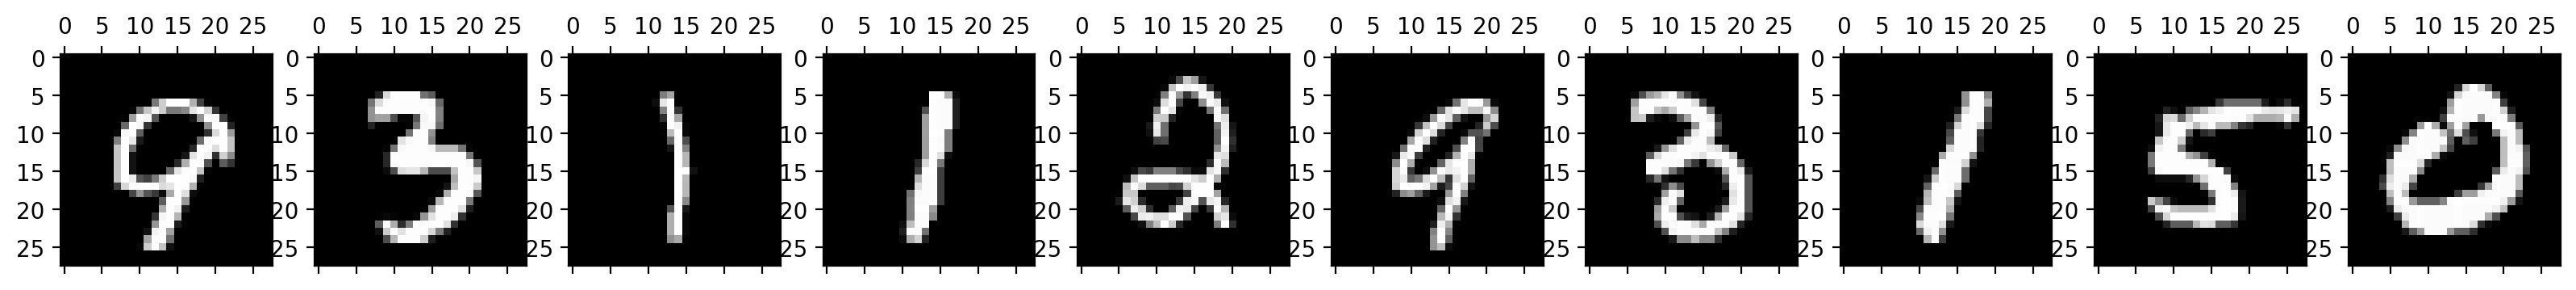

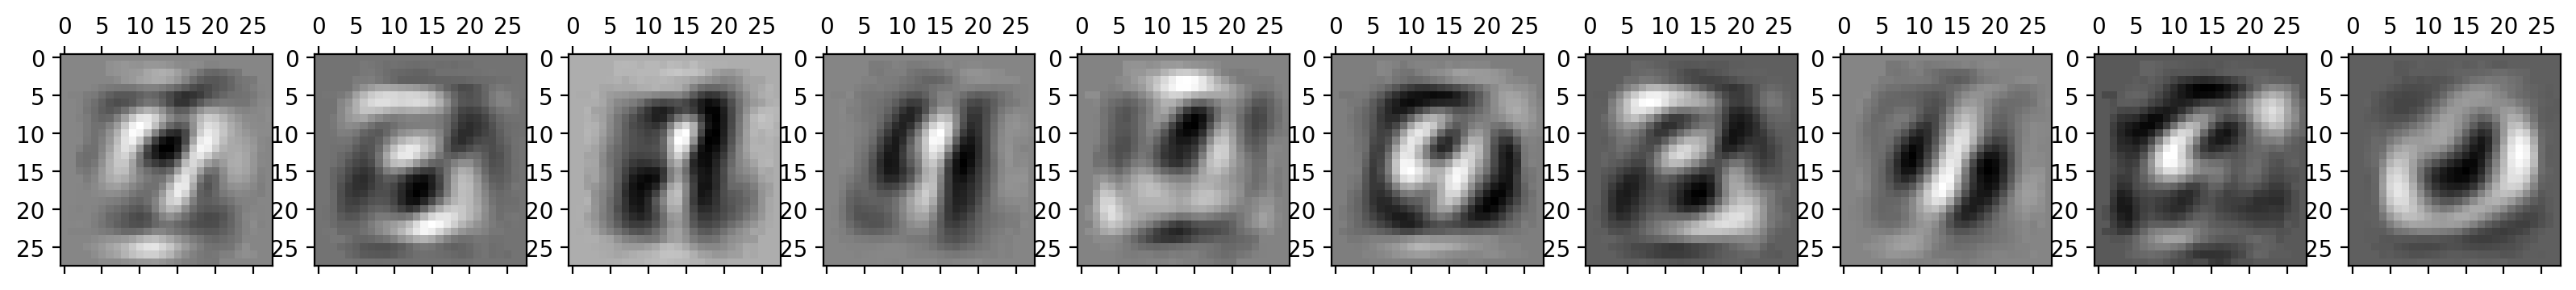

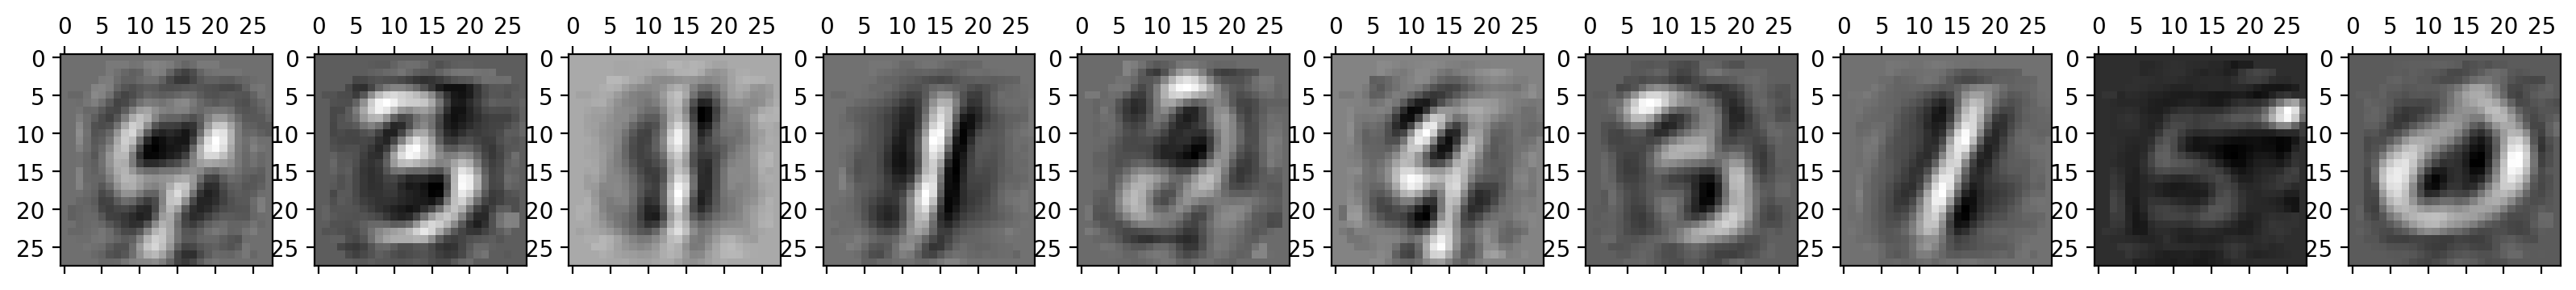

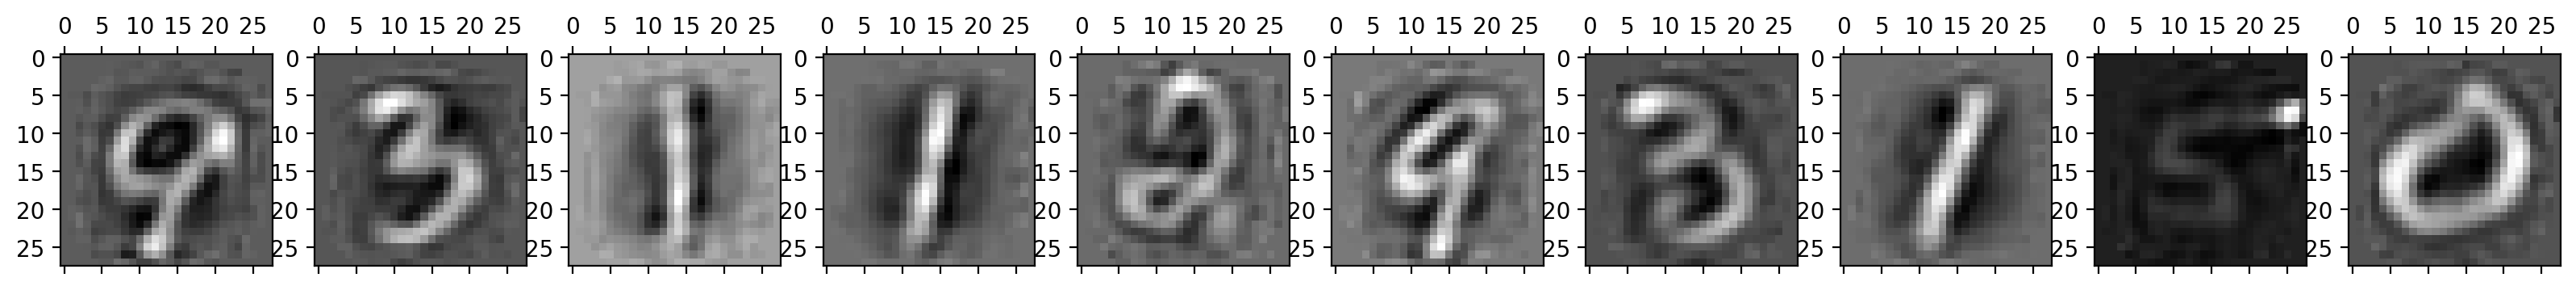

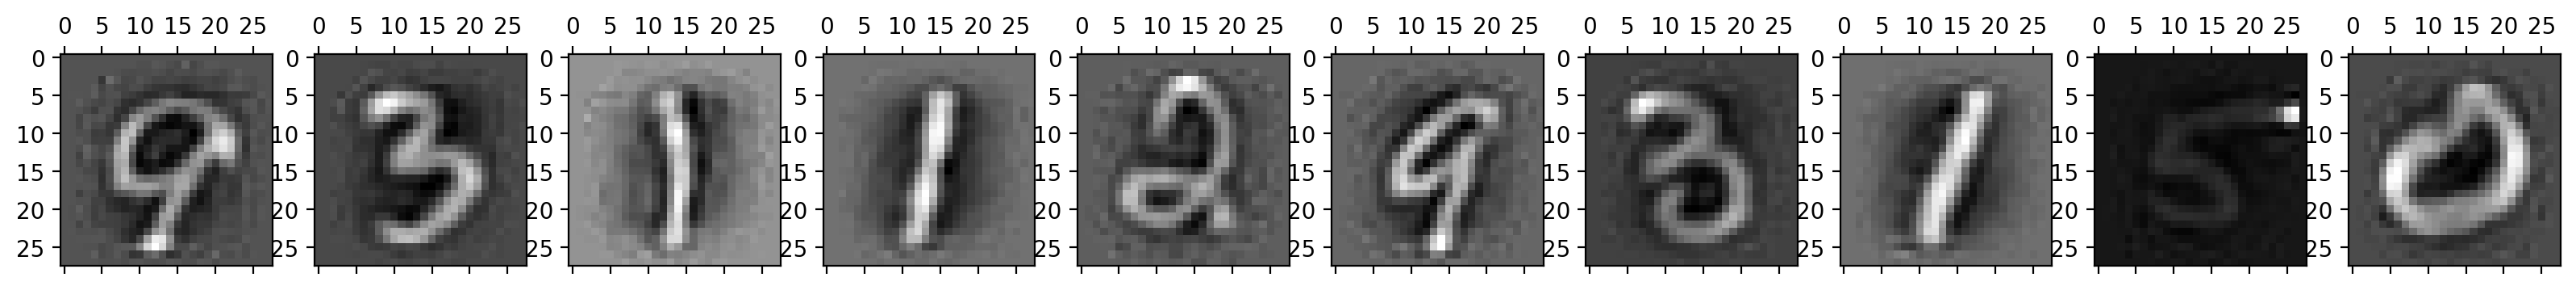

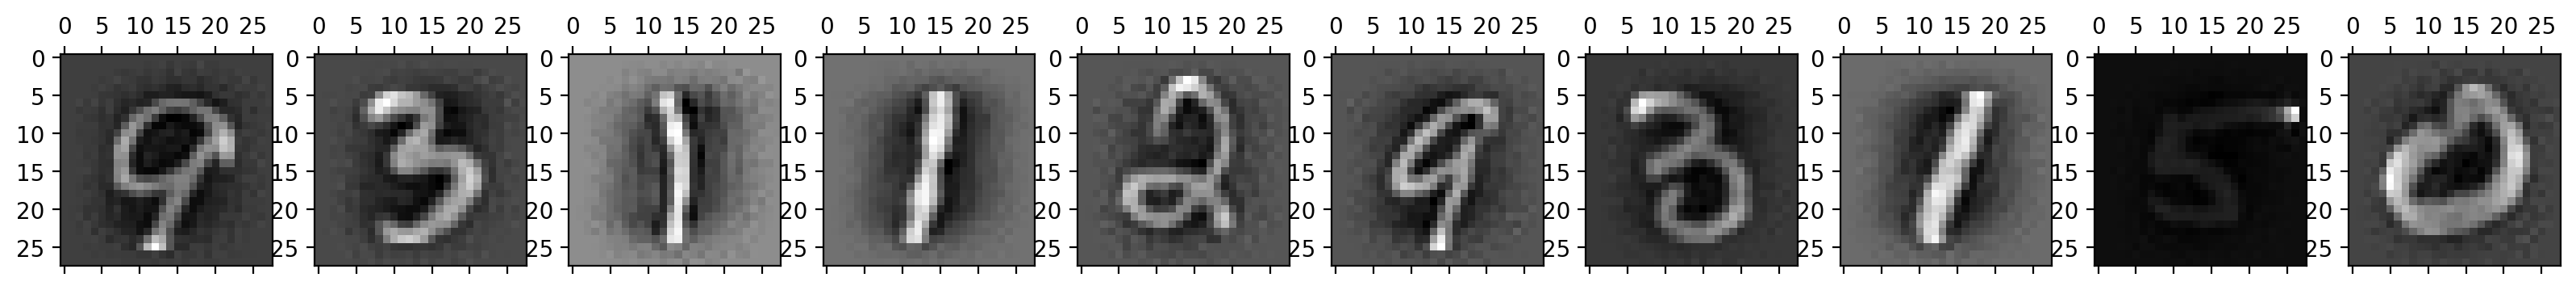

In [50]:
plot_varying_components(X_train, 10, [10, 50, 100, 200, 300], (28, 28))

### Classifier

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

# sample of classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics

In [52]:
# get X and y

X = df[df.columns[df.columns.str.startswith('pixel')]]
y = df['class']

In [53]:
X.shape

(5000, 784)

In [54]:
y.shape

(5000,)

In [55]:
X.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y.head(3)

0    3
1    3
2    1
Name: class, dtype: int64

In [57]:
test_size = .2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 7, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 784), (1000, 784), (4000,), (1000,))

#### run StandardScaler (mean = 0, sd = 1)

In [58]:
scaler = StandardScaler()
scaler

StandardScaler()

In [59]:
scaler.fit(X_train) # Fit on training set only.

StandardScaler()

In [60]:
# Apply transform to both the training set and the test set.

X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

#### Classify using all features

In [61]:
model = SVC(gamma = 'scale') # get a model
# model = RandomForestClassifier()
model.fit(X_train_t, y_train) # fit/train a model
train_score = model.score(X_train_t, y_train) # get train score
test_score = model.score(X_test_t, y_test) # get test score

print(f'accuracy (train) = {train_score:.4f}, accuracy (test) = {test_score:.4f}')

accuracy (train) = 0.9842, accuracy (test) = 0.9160


#### Classify using varous reduced dimension

In [62]:
for n in [10, 50, 100, 200, 300]:

    pca = PCA(n)
    pca.fit(X_train_t)

    X_train_pca = pca.transform(X_train_t)
    X_test_pca = pca.transform(X_test_t)
    model = SVC(gamma = 'scale')
#     model = RandomForestClassifier()
    model.fit(X_train_pca, y_train)
    print(f'components = {n:3}(explained variance = {np.sum(pca.explained_variance_ratio_)*100:.2f}%), accuracy (train) = {model.score(X_train_pca, y_train):.4f}, accuracy (test) = {model.score(X_test_pca, y_test):.4f}')

components =  10(explained variance = 31.13%), accuracy (train) = 0.9155, accuracy (test) = 0.8740
components =  50(explained variance = 62.24%), accuracy (train) = 0.9728, accuracy (test) = 0.9270
components = 100(explained variance = 78.39%), accuracy (train) = 0.9740, accuracy (test) = 0.9270
components = 200(explained variance = 92.00%), accuracy (train) = 0.9808, accuracy (test) = 0.9230
components = 300(explained variance = 96.55%), accuracy (train) = 0.9822, accuracy (test) = 0.9180


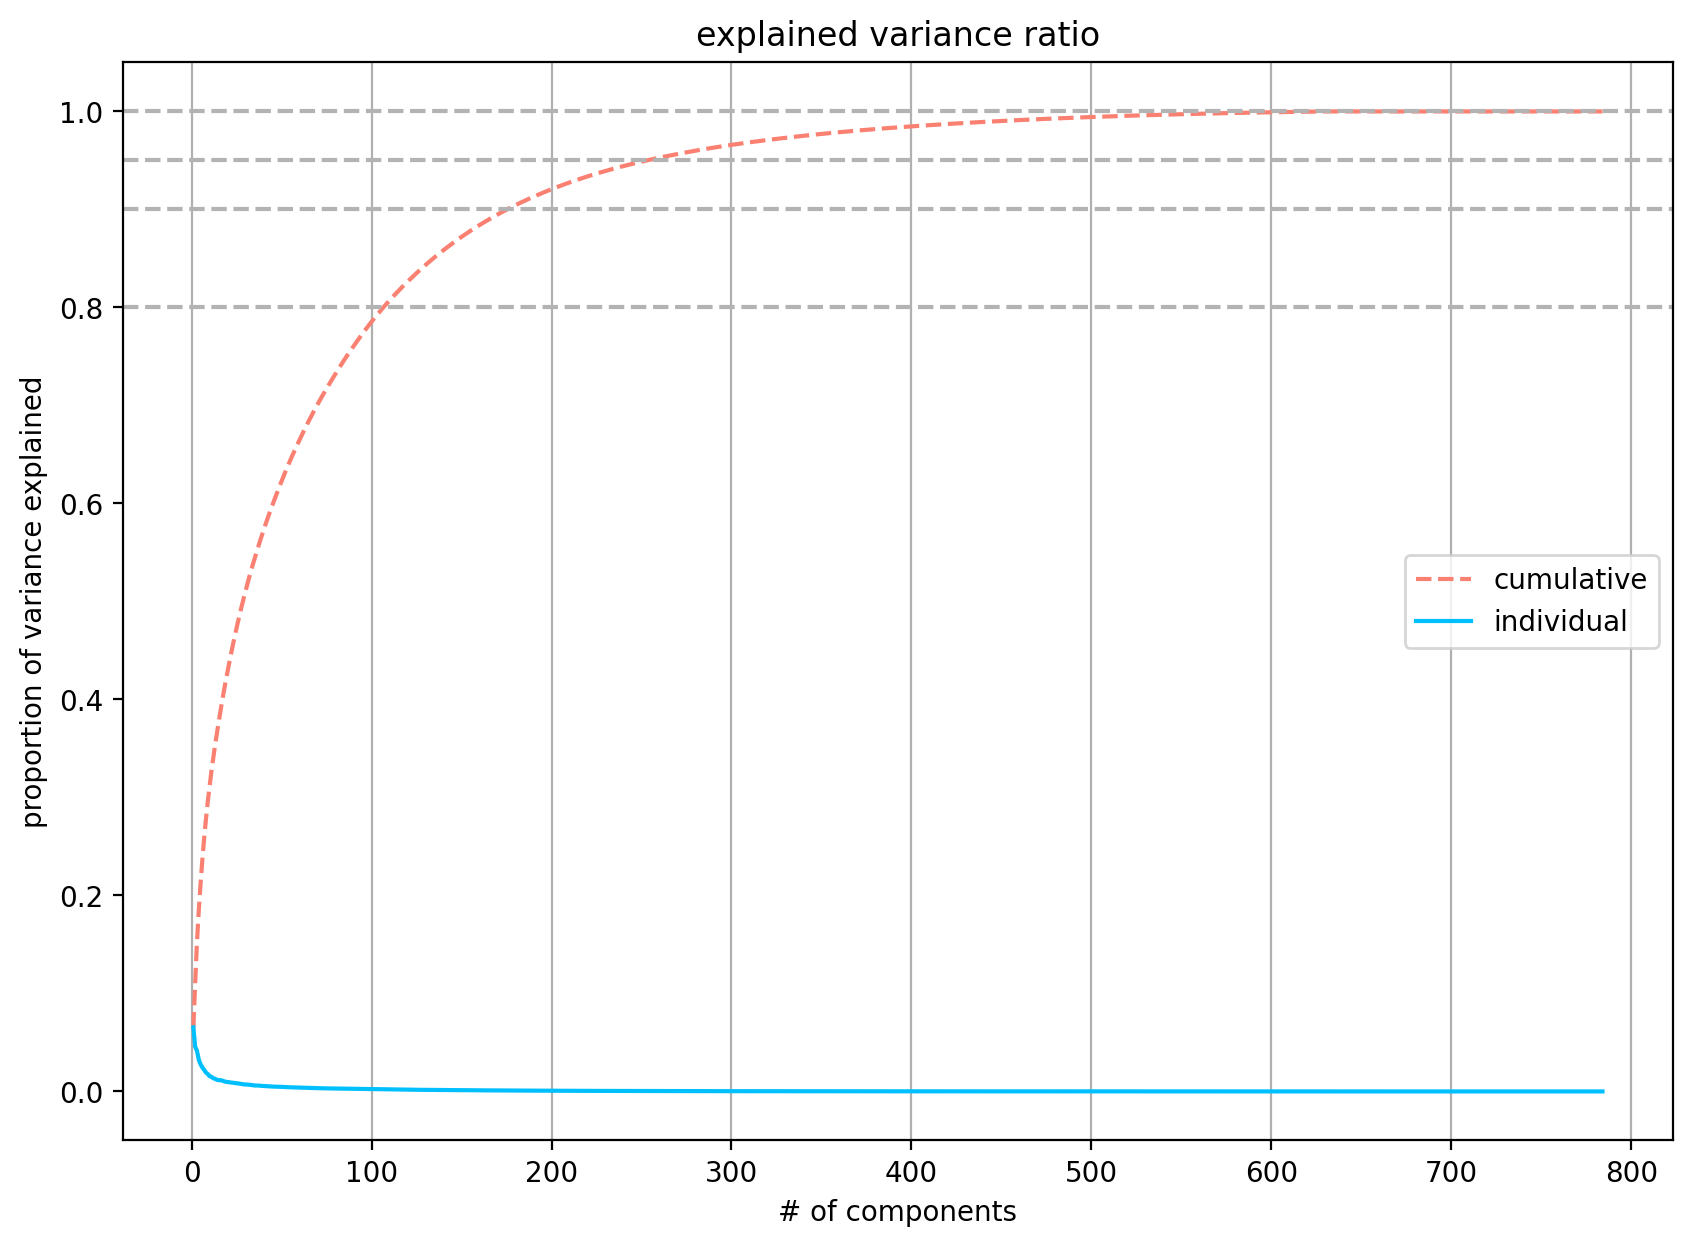

In [63]:
scree_plot(X_train, X_train.shape[1], True, False)